In [87]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
merged_df = city_df.merge(ride_df, on = "city")

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

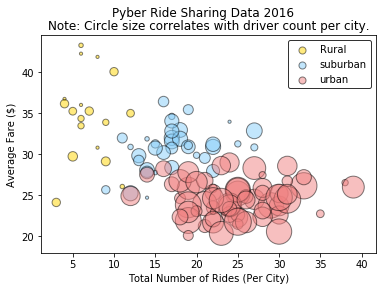

In [94]:
# Obtain the x and y coordinates for each of the three city types
# Group by city name
groupby_city = merged_df.groupby("city")

# Calculate average fare by city
average_fare_by_city = groupby_city.mean()["fare"]

# Calculate number of ride by city
ride_count_by_city = groupby_city["ride_id"].count()

# Calculate number of drivers
driver_count = groupby_city.mean()["driver_count"]

# City type
city_type = city_df.set_index("city")["type"]

# Create DataFrame from above
city_info_df = pd.DataFrame({"Number of Rides": ride_count_by_city,
                            "Average Fare": average_fare_by_city,
                            "Number of Drivers": driver_count,
                             "Type of City": city_type})

city_info_df.sort_values("Number of Drivers", ascending = False)

rural = city_info_df[city_info_df["Type of City"] == "Rural"]
suburban = city_info_df[city_info_df["Type of City"] == "Suburban"]
urban = city_info_df[city_info_df["Type of City"] == "Urban"]

# Build the scatter plots for each city types
plt.scatter(rural["Number of Rides"], rural["Average Fare"], s = rural["Number of Drivers"]*10, 
            color = "gold", edgecolor = "black", label = "Rural", alpha = 0.50)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], s = suburban["Number of Drivers"]*10, 
            color = "lightskyblue", edgecolor = "black", label = "suburban", alpha = 0.50)
plt.scatter(urban["Number of Rides"], urban["Average Fare"], s = urban["Number of Drivers"]*10, 
            color = "lightcoral", edgecolor = "black", label = "urban", alpha = 0.50)

# Incorporate the other graph properties
plt.suptitle("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(frameon = True, edgecolor = "black")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.title("Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Pyber/Images/Pyber_Ride_Sharing_Data_2016.png")

## Total Fares by City Type

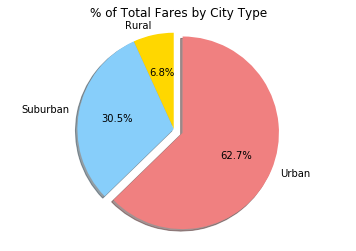

In [89]:
# Calculate Type Percents
# Group by type
groupby_type_df = merged_df.groupby("type")["type", "fare", "ride_id", "driver_count"]

# Calculate total fare by city
total_fare_city = groupby_type_df.sum()["fare"]

# Build Pie Chart
labels = total_fare_city.index

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.pie(total_fare_city, explode = explode, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/Images/%_of_Total_Fares_By_City_Type.png")

## Total Rides by City Type

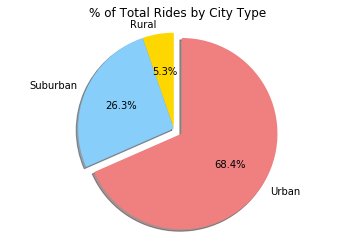

In [90]:
# Calculate Ride Percents
# Number of rides per city type
number_of_rides = groupby_type_df.count()["ride_id"]

labels = number_of_rides.index

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.pie(number_of_rides, explode = explode, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/Images/%_of_Total_Rides_By_City_Type.png")

## Total Drivers by City Type

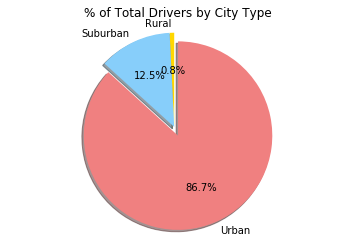

In [86]:
# Calculate Driver Percents
# Number of drivers per city type
number_drivers_city = groupby_type_df.sum()["driver_count"]

labels = number_drivers_city.index

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.pie(number_drivers_city, explode = explode, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/Images/%_of_Total_Drivers_By_City_Type.png")